In [2]:
import xgboost as xgb
import pandas as pd
import numpy as np

In [3]:
train_data = pd.read_csv('train_data_750.csv') # train data
test_data = pd.read_csv("test_data_750.csv") # test data
train_label = pd.read_csv("../trainLabels.csv") # train labels
test_label = pd.read_csv("../testLabels.csv") # test labels

In [5]:
# From this cell to a few below cells, I'm going to manipulate the data into numpy that can be fitted to XGBoost.
train_data_with_labels = pd.merge(train_data, train_label, on="Id")
test_data_with_labels = pd.merge(test_data, test_label, on="Id")

test_data_with_labels

,Id,FF85C074,00008378,0000E8A4,00800001,5E33C05B,F8FFFF8D,00840000,1083C40C,64006400,...,22000001,014C6F61,F5DB0000,37740000,FB5F0000,A450FF15,000029C2,000E1600,601D0000,Class
0,0ZTEyLXaWReMK3rYVCjv,1,0,0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,2oMjFb1UfIym9ZgxDPqG,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
2,i8WIr0dtVHSGMmwFlcUY,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
3,0IMUKlZs1Sm8LpGRkWhT,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
4,14lJRXiAchNqVFSOBLgb,1,1,1,0,0,0,1,0,0,...,1,1,0,0,0,1,1,0,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,0HKM38fmCR5DrxoIkBnQ,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,2
59,0zr6vIw74DgVSKXiRUY1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,8
60,0hH3JB2wM79lYdsyuK5N,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
61,1Skcwz5YxWihMqIyt30X,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6


In [6]:
train_complete_numpy = train_data_with_labels.to_numpy().T
test_complete_numpy = test_data_with_labels.to_numpy().T

test_complete_numpy

array([['0ZTEyLXaWReMK3rYVCjv', '2oMjFb1UfIym9ZgxDPqG',
        'i8WIr0dtVHSGMmwFlcUY', ..., '0hH3JB2wM79lYdsyuK5N',
        '1Skcwz5YxWihMqIyt30X', '0i4ENysvVrgFnbaHUuJK'],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 7, 5, ..., 3, 6, 3]], dtype=object)

In [8]:
train_data = train_complete_numpy[1:-1].T
train_label = train_complete_numpy[-1] - 1 # since XGBoost take labels as 0 ~ num_class -1, have to subtract 1
test_data = test_complete_numpy[1:-1].T
test_label = test_complete_numpy[-1] - 1

train_data

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 1, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=object)

In [9]:
train = xgb.DMatrix(train_data, label = train_label)
test = xgb.DMatrix(test_data, label = test_label)

In [10]:
param = {'max_depth': 4, 'eta':0.3, 'objective':'multi:softmax','num_class':9 }
epochs = 10

In [11]:
model = xgb.train(param, train, epochs) # model training

In [12]:
prediction = model.predict(test)

In [13]:
print(prediction)
print(test_label)

[0. 6. 4. 2. 8. 6. 8. 8. 4. 1. 1. 0. 6. 7. 8. 1. 4. 2. 8. 3. 3. 2. 3. 0.
 1. 8. 1. 3. 6. 7. 6. 4. 6. 5. 7. 4. 2. 5. 7. 3. 3. 5. 0. 3. 1. 7. 0. 8.
 8. 5. 5. 2. 5. 4. 5. 6. 7. 0. 1. 7. 2. 5. 2.]
[0 6 4 2 8 6 0 8 4 1 1 0 6 7 8 1 4 2 8 3 3 2 3 0 1 8 1 3 6 7 6 4 6 4 7 4 2
 5 7 3 3 5 0 3 1 7 0 8 8 5 5 2 5 4 5 6 7 0 1 7 2 5 2]


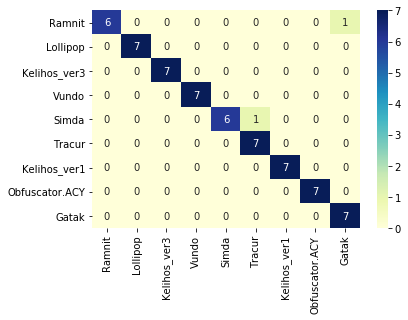

In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
c = confusion_matrix(test_label.astype(np.int8), prediction)

classes = ["Ramnit",
"Lollipop",
"Kelihos_ver3",
"Vundo",
"Simda",
"Tracur",
"Kelihos_ver1",
"Obfuscator.ACY",
"Gatak"]

df_cm = pd.DataFrame(c, index = classes, columns = classes)
sn.heatmap(df_cm, annot=True, cmap="YlGnBu")

In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(test_label.astype(np.int8), prediction)

0.9682539682539683

In [17]:
tp_fn = c.sum(1)
tp_fp = c.sum(0)
tp = c.diagonal()
precision = (tp*1.0/tp_fp)
recall = (tp*1.0/tp_fn)

In [18]:
pd.DataFrame([precision, recall],
                         columns = ["Ramnit", "Lollipop", "Kelihos_ver3", "Vundo", "Simda", "Tracur", "Kelihos_ver1", "Obfuscator.ACY", "Gatak"],
                         index = ['Precision', 'Recall'] )

,Ramnit,Lollipop,Kelihos_ver3,Vundo,Simda,Tracur,Kelihos_ver1,Obfuscator.ACY,Gatak
Precision,1.000000,1.0,1.0,1.0,1.000000,0.875,1.0,1.0,0.875
Recall,0.857143,1.0,1.0,1.0,0.857143,1.000,1.0,1.0,1.000
